## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l1_l2

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("L1 Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results_l1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}






L1 Experiment with Regulizer = 0.010000


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same b

Epoch 30/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.4626 - acc: 0.0984 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.4626 - acc: 0.0997 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==

50000/50000 [==============================] - 8s 162us/step - loss: 3.4914 - acc: 0.5825 - val_loss: 3.6203 - val_acc: 0.5264
Epoch 32/50
50000/50000 [==============================] - 8s 163us/step - loss: 3.4371 - acc: 0.5870 - val_loss: 3.5994 - val_acc: 0.5215
Epoch 33/50
50000/50000 [==============================] - 8s 162us/step - loss: 3.3858 - acc: 0.5865 - val_loss: 3.5469 - val_acc: 0.5242
Epoch 34/50
50000/50000 [==============================] - 8s 162us/step - loss: 3.3333 - acc: 0.5915 - val_loss: 3.5135 - val_acc: 0.5161
Epoch 35/50
50000/50000 [==============================] - 7s 149us/step - loss: 3.2835 - acc: 0.5930 - val_loss: 3.4509 - val_acc: 0.5301loss: 3.290 - ETA: 2s - loss: 3.2876 -  - ETA: 1s - 
Epoch 36/50
50000/50000 [==============================] - 7s 142us/step - loss: 3.2324 - acc: 0.5975 - val_loss: 3.4052 - val_acc: 0.5311
Epoch 37/50
50000/50000 [==============================] - 8s 165us/step - loss: 3.1872 - acc: 0.5996 - val_loss: 3.4221 - val

50000/50000 [==============================] - 9s 172us/step - loss: 1.1203 - acc: 0.6043 - val_loss: 1.3776 - val_acc: 0.5168
Epoch 32/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.1052 - acc: 0.6129 - val_loss: 1.3620 - val_acc: 0.5165
Epoch 33/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.0880 - acc: 0.6147 - val_loss: 1.3910 - val_acc: 0.5169
Epoch 34/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.0816 - acc: 0.6211 - val_loss: 1.3362 - val_acc: 0.5366
Epoch 35/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.0680 - acc: 0.6263 - val_loss: 1.3649 - val_acc: 0.5191
Epoch 36/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.0528 - acc: 0.6298 - val_loss: 1.3557 - val_acc: 0.5296
Epoch 37/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.0365 - acc: 0.6369 - val_loss: 1.3868 - val_acc: 0.5170
Epoch 38/50
50000/50000 [==============

50000/50000 [==============================] - 8s 168us/step - loss: 1.1156 - acc: 0.6074 - val_loss: 1.3812 - val_acc: 0.5145
Epoch 32/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.0995 - acc: 0.6132 - val_loss: 1.3467 - val_acc: 0.5260
Epoch 33/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0888 - acc: 0.6174 - val_loss: 1.3424 - val_acc: 0.5272
Epoch 34/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0768 - acc: 0.6220 - val_loss: 1.3940 - val_acc: 0.5164
Epoch 35/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0674 - acc: 0.6249 - val_loss: 1.4412 - val_acc: 0.5056
Epoch 36/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0475 - acc: 0.6311 - val_loss: 1.5268 - val_acc: 0.4788
Epoch 37/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0403 - acc: 0.6322 - val_loss: 1.3292 - val_acc: 0.5372
Epoch 38/50
50000/50000 [==============

In [9]:
results_l1_l2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("L1_L2 Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results_l1_l2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



L1_L2 Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 18.7954 - acc: 0.2743 - val_loss: 17.3466 - val_acc: 0.3468
Epoch 2/50
50000/50000 [==============================] - 9s 174us/step - loss: 16.1275 - acc: 0.3610 - val_loss: 14.9606 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 13.9438 - acc: 0.3842 - val_loss: 12.9634 - val_acc: 0.3882
Epoch 4/50
50000/50000 [==============================] - 9s 176us/step - loss: 12.0974 - acc: 0.3986 - val_loss: 11.2700 - val_acc: 0.3953
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 10.5275 - acc: 0.4062 - val_loss: 9.8221 - val_acc: 0.4063
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 9.1926 - acc: 0.4125 - val_loss: 8.5954 - val_acc: 0.4108
Epoch 7/50
50000/50000 [==============================] - 9s 175us/step - loss: 8.0545 - acc: 0.4177 - val_loss:

50000/50000 [==============================] - 10s 200us/step - loss: 15.1074 - acc: 0.2588 - val_loss: 13.9734 - val_acc: 0.3243
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 13.0349 - acc: 0.3516 - val_loss: 12.1412 - val_acc: 0.3662
Epoch 3/50
50000/50000 [==============================] - 9s 170us/step - loss: 11.3613 - acc: 0.3732 - val_loss: 10.6174 - val_acc: 0.3732
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 9.9475 - acc: 0.3884 - val_loss: 9.3131 - val_acc: 0.3936
Epoch 5/50
50000/50000 [==============================] - 9s 173us/step - loss: 8.7460 - acc: 0.3995 - val_loss: 8.2104 - val_acc: 0.3982
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 7.7225 - acc: 0.4066 - val_loss: 7.2628 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 9s 176us/step - loss: 6.8487 - acc: 0.4137 - val_loss: 6.4557 - val_acc: 0.4148
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 4s 72us/step - loss: 13.0297 - acc: 0.3551 - val_loss: 12.1374 - val_acc: 0.3690
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 11.3544 - acc: 0.3785 - val_loss: 10.6041 - val_acc: 0.3878
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 9.9430 - acc: 0.3918 - val_loss: 9.3036 - val_acc: 0.3987
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 8.7415 - acc: 0.4024 - val_loss: 8.2045 - val_acc: 0.4020
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 7.7184 - acc: 0.4102 - val_loss: 7.2573 - val_acc: 0.4112
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 6.8448 - acc: 0.4175 - val_loss: 6.4497 - val_acc: 0.4201
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 6.0999 - acc: 0.4226 - val_loss: 5.7614 - val_acc: 0.4250
Epoch 9/50
50000/50000 [========================

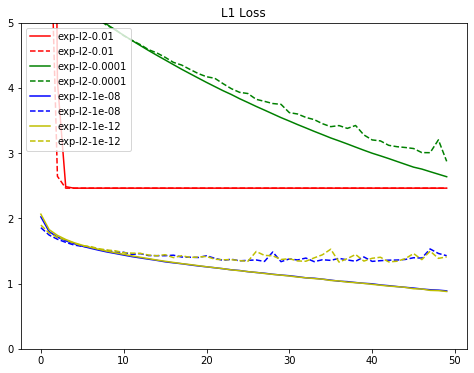

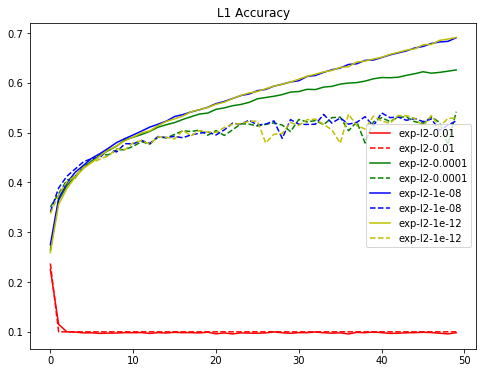

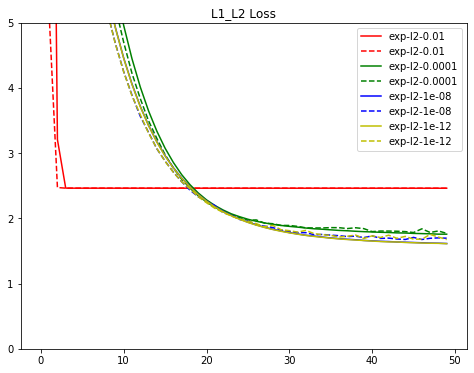

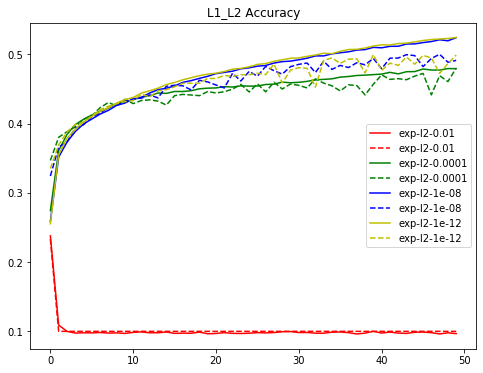

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-loss'])),results_l1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-loss'])),results_l1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("L1 Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train-acc'])),results_l1[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid-acc'])),results_l1[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("L1 Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train-loss'])),results_l1_l2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid-loss'])),results_l1_l2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("L1_L2 Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train-acc'])),results_l1_l2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid-acc'])),results_l1_l2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("L1_L2 Accuracy")
plt.legend()
plt.show()